In [1]:
import pandas as pd
import re 

def clean_text(text):
    # remove multiple newlines
    text = re.sub(r'\n+', '\n', text)
    # remove multiple spaces
    text = re.sub(r' +', ' ', text)
    # strip leading and trailing whitespace
    text = text.strip()
    # remove triple backticks and the word markdown
    text = text.replace("```", "").replace("markdown", "")
    # remove first and last newlines
    text = text.lstrip('\n').rstrip('\n')
    return text


df = pd.read_csv("data/processed/resumes.csv")
df.drop(columns=['resume', 'anonymized', 'reformatted'], inplace=True)
df.rename(columns={'localized': 'resume'}, inplace=True)
df['resume'] = df['resume'].apply(clean_text)
df.head(5)

,Category,resume
0,HR,## [Candidate Name]\n**ASSISTANT MANAGER - HR*...
1,HR,[Candidate Name]\n## HR ASSISTANT\n**Summary**...
2,DESIGNER,[CANDIDATE NAME]\n# SENIOR GRAPHIC DESIGNER\n#...
3,DESIGNER,[CANDIDATE NAME]\n## WEBSITE DESIGNER\n**Summa...
4,INFORMATION-TECHNOLOGY,[Candidate Name] \n## INFORMATION TECHNOLOGY S...


In [2]:
from IPython.display import display, Markdown
from transformers import pipeline
import re
from collections import Counter

# 1. Load a small local NER model
ner = pipeline("ner", model="dslim/bert-base-NER", grouped_entities=True)


# 3. Simple helper: check if mention is in educational context
def is_education_context(sentence, org):
    keywords = ["study", "studied", "graduated", "degree", "phd", "bachelor", 
                "master", "diploma", "alumni", "completed", "course", "education"]
    window = 10  # number of words around the org to scan
    words = sentence.lower().split()
    org_words = org.lower().split()
    try:
        idx = words.index(org_words[0])
    except ValueError:
        return False
    context = words[max(0, idx-window): idx+len(org_words)+window]
    return any(kw in context for kw in keywords)

# 4. Process each sentence
counts = Counter()
    

for i, row in df.iterrows():
    if 'education' in row['resume'].lower():
        # print the sentences with the word education
        sentences = re.split(r'(?<=[.!?]) +', row['resume'])
        for sent in sentences:
            if 'education' in sent.lower():
                orgs = [ent['word'] for ent in ner(sent) if ent['entity_group'] == "ORG"]
                edu_orgs = [org for org in orgs if is_education_context(sent, org)]
                counts.update(edu_orgs)

print(counts)
print(sum(counts.values()))

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0
/opt/miniconda3/envs/hiring-agent/lib/python3.11/site-packages/transformers/pipelines/token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


Counter({'National University of Singapore Singapore': 5, 'National University of Singapore': 4, 'Singapore Management University': 3, 'Singapore Polytechnic Singapore': 3, 'Singapore Nursing Board': 3, 'Singapore Management University Singapore': 3, 'Nanyang Technological University': 2, 'and Training': 2, 'OSHA': 2, 'Management': 2, 'Nanyang Technological University Singapore': 2, 'Comprehensive Education Plan Committee': 2, 'Resource': 1, 'Management Information System': 1, 'High School': 1, 'Singapore University of Social Sciences Singapore': 1, 'Singapore Nursing Academy': 1, 'Nanyang Polytechnic': 1, 'Singapore Institute of Technology Singapore': 1, 'Singapore Civil Defence Force': 1, 'Business Administration': 1, 'Singapore Human Resources Institute': 1, 'Chemistry': 1, 'Science': 1, 'Environmental Management': 1, 'Natural Resources Management': 1, 'National Parks Board Singapore': 1, 'Nanyang Polytechnic Singapore': 1, 'Singapore': 1, 'Computer Systems and Network Technology': 

In [3]:
from IPython.display import display, Markdown

# print all resumes
for i, row in df.iterrows():
    display(Markdown(f"### Resume {i+1}\n{row['resume']}\n"))
    break
    

### Resume 1
## [Candidate Name]
**ASSISTANT MANAGER - HR**
**Professional Summary** 
Human Resource Professional with over 4 years of rich experience in Recruitment, Organization Development, Time Management, Training & Development, Performance Management, Employee Engagement, TPM & Audit. Worked as an Assistant Manager - HR (Generalist Profile) with Singapore Manufacturing Company at its manufacturing unit, assisting HRM & SAP at the unit. Possess strong communication, interpersonal, problem-solving, and analytical skills. Demonstrated ability to learn and master new skills/tools quickly, even under strict deadlines. A mentor and resource developer, eager to contribute to a team of ambitious individuals while enhancing personal knowledge and growth.
 
**Skills** 
- SAP R/3 4.7 
- MS Office (Word, Excel, PowerPoint, Outlook, Internet Applications) 
- Good understanding of SQL, HTML, CSS, and JavaScript 
- Operating Systems: Windows 10, Windows 7 
- Functional Knowledge: Recruitment, Organization Management, Time Management, Payroll, Benefits, Personal Administration, Training and Development, Employee Self-Service, Performance Appraisal 
 
**Work History** 
**Assistant Manager - HR** 
Singapore Manufacturing Company 
September 2012 to August 2013 
- Managed generalist HR functions including Recruitment, Training & Development, Performance Appraisal, Employee Engagement, Audit, and SAP-HR PA - Personnel Administration. 
- Defined the Enterprise Structure, Personnel Structure, and Pay Scale Structure for the enterprise, linking the Pay Scale and Enterprise Structures. 
- Configured user parameters and number range intervals for personnel numbers. 
- Customized personal data and basic settings for Personnel Administration. 
- Developed personnel actions and reasons for changes in personnel actions. 
- Configured Personnel Area Groupings and Employee Groupings, assigning Personnel Area to Company Code. 
- Executed various personnel actions, including hiring, organizational reassignment, pay changes, and terminations. 
- Utilized PA30, PA40, PA10, PA20 for personnel administration tasks. 
 
**Recruitment & Selection** 
- Involved in the full life cycle of the Recruitment Process. 
- Conducted induction for new joiners. 
- Prepared Job Descriptions and defined Roles & Responsibilities for departments. 
 
**Training & Development** 
- Established, implemented, and maintained an effective Training & Development system within the organization. 
- Deployed Competency Model (Competency Mapping/Skill Mapping). 
- Identified training needs of employees through Performance Management System & Individual Development Plans and Workmen through Skill Matrix. 
- Prepared and circulated Annual and Monthly Training Calendars as per Quality Management System (ISO/TS 16949:2009 & OHSAS). 
- Designed and developed training procedures, modules, and activities in alignment with training requirements. 
- Organized internal and external training programs, On-the-Job Training, events, and workshops. 
- Created Pre & Post-Training Assessment Tools (Evaluation/Effectiveness) to gauge skill levels and gaps. 
- Developed training budget with cost reduction initiatives. 
 
**Employee Engagement** 
- Fostered connections with employees and their families through engagement initiatives, including welfare and sports events, medical support, and benefits. 
- Communicated business plans and goals at the unit level through formal and informal setups. 
- Organized various activities such as get-togethers, birthday celebrations, painting competitions, safety day celebrations, Kaizen competitions, and sports activities. 
 
**Performance Management** 
- Coordinated with Functional Heads to establish Key Result Areas for employees. 
- Timely distributed Performance Appraisal Forms to all departments. 
- Participated in mid-year and annual appraisals, ensuring timely delivery of appraisal and promotion letters. 
- Managed performance reviews for trainees and probationers. 
 
**Statutory Compliance & Grievance Handling** 
- Involved in Provident Fund, Gratuity, Labour Welfare Fund, Factory License renewal, Contract Labour Management, Labour welfare, Standing Orders, and resolving Industrial Relations issues in the plant. 
 
**TPM** 
- Appointed as TPM ET-Pillar Head, responsible for the education and training of staff and workers according to the TPM method. 
 
**Audit** 
- Managed various customer audits (e.g., Client A, Client B, Client C), ISO/TS 16949:2009, EMS-OHSAS, and TPM Audits. 
 
**Administration Management** 
- Oversaw canteen operations, housekeeping, security, vehicle management, stationery, and guest management. 
 
**HR Initiatives** 
- Launched various HR activities at the plant level, including a suggestion scheme, Coffee with HR, Connect to Home, skip-level meetings, knowledge sharing, birthday celebrations, and employee appreciation initiatives. 
- Established a cafeteria and library for employee use. 
 
**Assistant Manager - HR** 
Global Tech Solutions 
July 2010 to July 2011 
- Maintained HR database and generated various HR reports for management. 
- Managed organizational structures, created positions and jobs in SAP. 
- Supported HR administration of pay and bonus reviews, providing reports and statistics to senior managers. 
- Maintained attendance and leave records of employees in SAP. 
- Involved in the full life cycle of the Recruitment Process and onboarding. 
- Prepared and updated organizational charts and headcount reports (HR Management Information System). 
- Developed Job Descriptions and defined Roles & Responsibilities for departments. 
- Timely distributed Performance Appraisal Forms to all departments. 
- Participated in mid-year and annual appraisals, ensuring timely delivery of appraisal and promotion letters. 
 
**Assistant Manager - HR** 
Innovative Solutions Pte Ltd 
May 2008 to May 2010 
- Oversaw the recruitment process to ensure the best fit for client requirements. 
- Assessed position requirements in terms of competencies and experience. 
- Sourced suitable profiles from various channels. 
- Conducted interviews to gauge candidate interest and suitability. 
- Coordinated with clients to confirm profile suitability and scheduled interviews until final selection. 
- Maintained records of operations and addressed various recruitment inquiries. 
- Cultivated excellent relationships with clients to assist them in finding the best employees for their businesses. 
 
**Education** 
- Bachelor of Education (B.Ed): Education, 2005 - 2007, National University of Singapore 
- MBA: Human Resource Management, 2008 - 2010, Singapore Management University 
- Bachelor of Science (B.Sc): Biotechnology, 2004 - 2005, Nanyang Technological University 
 
**Skills** 
Basic, Benefits, Budget, Business Plan, Cost Reduction, CSS, Client, Clients, Database, Delivery, Designing, Full Life Cycle, Functional, Hiring, HTML, HR, Internet Applications, ISO, JavaScript, Letters, Excel, MS Office, Outlook, PowerPoint, Windows 10, Windows 7, Word, Employee Self-Service, Management Information System, Enterprise, Operating Systems, Organizing, Organizational, Painting, Payroll, Performance Appraisal, Performance Management, Personnel, Promotion, Recruitment, Requirement, Safety, SAP, SAP R/3 4.7, SAP-HR, Scheduling, Scheme, SQL, Time Management, Training Programs, Written.


In [4]:
identical = {
    "NUS": ["National University of Singapore", "National University of Singapore Singapore", "NUS Singapore", "NUS University", "NUS University Singapore"],
    "NTU": ["Nanyang Technological University", "Nanyang Technological University Singapore", "NTU Singapore", "NTU University", "NTU University Singapore"],
    "SMU": ["Singapore Management University", "Singapore Management University Singapore", "SMU Singapore", "SMU University", "SMU University Singapore"],
    "SUTD": ["Singapore University of Technology and Design", "Singapore University of Technology and Design Singapore", "SUTD Singapore", "SUTD University", "SUTD University Singapore"],
    "SIT": ["Singapore Institute of Technology", "Singapore Institute of Technology Singapore", "SIT Singapore", "SIT University", "SIT University Singapore"],
    "SUS": ["Singapore University of Social Sciences", "Singapore University of Social Sciences Singapore", "SUSS Singapore", "SUSS University", "SUSS University Singapore"],
    "INSEAD": ["INSEAD Business School", "INSEAD Business School Singapore", "INSEAD Singapore", "INSEAD University", "INSEAD University Singapore"],
    "ESSEC": ["ESSEC Business School", "ESSEC Business School Singapore", "ESSEC Singapore", "ESSEC University", "ESSEC University Singapore"],
    "SP": ["Singapore Polytechnic", "Singapore Polytechnic Singapore", "SP Singapore", "SP University", "SP University Singapore"],
    "NP": ["Ngee Ann Polytechnic", "Ngee Ann Polytechnic Singapore", "NP Singapore", "NP University", "NP University Singapore"],
    "TP": ["Temasek Polytechnic", "Temasek Polytechnic Singapore", "TP Singapore", "TP University", "TP University Singapore"],
    "RP": ["Republic Polytechnic", "Republic Polytechnic Singapore", "RP Singapore", "RP University", "RP University Singapore"],
    "NYP": ["Nanyang Polytechnic", "Nanyang Polytechnic Singapore", "NYP Singapore", "NYP University", "NYP University Singapore"],
    "RI": ["Raffles Institution", "Raffles Institution Singapore", "RI Singapore", "RI School", "RI School Singapore"],
    "RJC": ["Raffles Junior College", "Raffles Junior College Singapore", "RJC Singapore", "RJC School", "RJC School Singapore"],
    "HCI": ["Hwa Chong Institution", "Hwa Chong Institution Singapore", "HCI Singapore", "HCI School", "HCI School Singapore"],
    "ACJC": ["Anglo-Chinese Junior College", "Anglo-Chinese Junior College Singapore", "ACJC Singapore", "ACJC School", "ACJC School Singapore"],
    "ACSI": ["Anglo-Chinese School (Independent)", "Anglo-Chinese School (Independent) Singapore", "ACSI Singapore", "ACSI School", "ACSI School Singapore"],
    "DHS": ["Dunman High School", "Dunman High School Singapore", "DHS Singapore", "DHS School", "DHS School Singapore"],
    "MGS": ["Methodist Girls' School", "Methodist Girls' School Singapore", "MGS Singapore", "MGS School", "MGS School Singapore"]

}
counts = Counter()
# find all counts of identical keys in each resume
for i, row in df.iterrows():
    for key in identical.keys():
        for variant in identical[key]:
            counts[key] += row['resume'].count(variant)
        counts[key] += row['resume'].count(key)
print(counts)

Counter({'SP': 33, 'NUS': 31, 'TP': 18, 'SMU': 14, 'NTU': 13, 'RI': 11, 'SIT': 10, 'RP': 3, 'NYP': 3, 'SUS': 2, 'NP': 1, 'HCI': 1, 'ACSI': 1, 'SUTD': 0, 'INSEAD': 0, 'ESSEC': 0, 'RJC': 0, 'ACJC': 0, 'DHS': 0, 'MGS': 0})


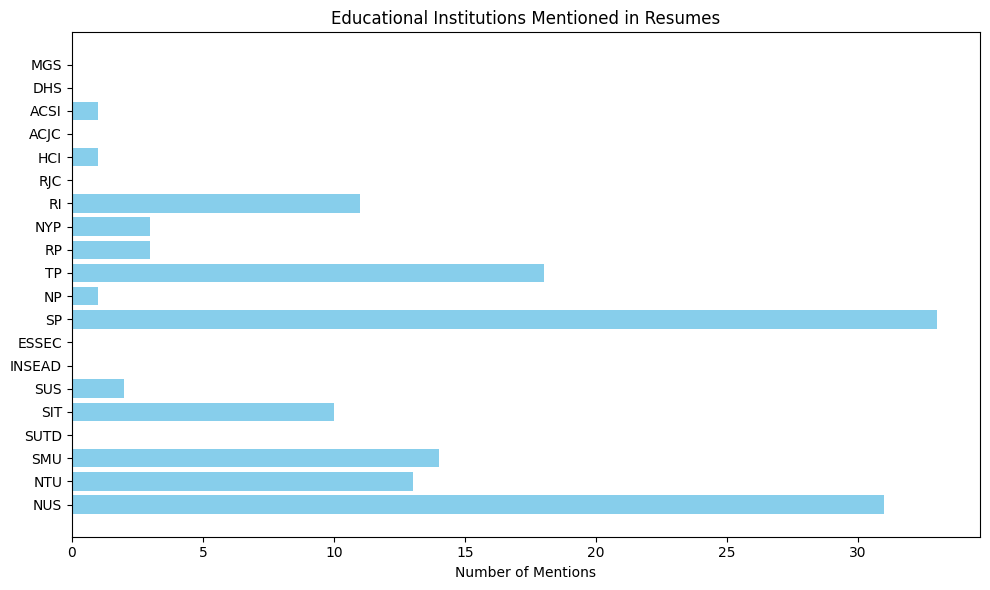

In [5]:
import matplotlib.pyplot as plt

# Only p]lot the educational institutions in identical.keys()
plt.figure(figsize=(10, 6))
plt.barh([key for key in counts.keys() if key in identical], [counts[key] for key in counts.keys() if key in identical], color='skyblue')
plt.xlabel('Number of Mentions')
plt.title('Educational Institutions Mentioned in Resumes')
plt.tight_layout()
plt.show()

In [6]:
aggregated_data = {
 'Singapore Manufacturing Company': 2,
 'Oracle': 2,
 'Singtel': 2,
 'DBS Bank': 17,
 'Frost Design': 1,
 'Singapore Armed Forces': 4,
 'Ministry of Health': 1,
 'Cyber Security Agency of Singapore': 2,
 'National Cyber Response Team': 1,
 'Public Service Division': 1,
 'ST Engineering': 2,
 'OCBC Bank': 8,
 'Raffles Institution': 1,
 'Little Skool-House International': 1,
 'McDonald’s Singapore': 1,
 'The Learning Lab': 2,
 'Healthway Medical Group': 2,
 'Home Nursing Foundation': 1,
 'SATS Ltd': 2,
 'Charles & Keith': 1,
 'Metro Holdings': 1,
 'H&M': 1,
 'Takashimaya': 1,
 'Raffles Medical Group': 3,
 'TCCC (The Coca-Cola Company)': 1,
 'National University of Singapore': 5,
 'Singapore Dental College': 1,
 'Fitness First': 1,
 'National Dental Centre Singapore': 1,
 'Singapore Red Cross': 2,
 'Ministry of Sustainability and the Environment': 1,
 'Singapore Polytechnic': 1,
 'National Parks Board': 1,
 'StarHub': 1,
 'Singapore Airlines': 1,
 'NTUC FairPrice': 1,
 'Chan Brothers Travel': 1,
 'Singapore Institute of Management': 1,
 'Temasek Polytechnic': 1,
 'Singapore Air Force': 2,
 'AXA Insurance': 1,
 'GWI Help Desk Solutions': 1,
 'SingHealth': 1,
 'HealthMetrics Pte Ltd': 1,
 'Mediacorp': 1,
 'Singapore Management University': 1,
 'Changi Airport Group': 1,
 'CapitaLand': 1,
 'TIBCO': 1,
 'NTUC': 1,
 'Time Out': 1,
 'The Honeycombers': 1,
 'CNA': 2,
 'Deloitte': 1,
 'Club 21': 2,
 'MediaTek': 1,
 'Nanyang Technological University': 1,
 'City Harvest Church': 1,
 'KRONOS': 1,
 'JD Edwards': 1,
 'Tech Solutions Pte Ltd': 2,
 'Health Promotion Board': 1,
 'OCBC Bank': 2,
 'UOB': 2,
 'United Overseas Bank': 1,
 'JP Morgan': 1,
 'Bloomberg': 1,
 'Singapore International School': 1,
 'Industrial Welding Company': 1,
 'Ministry of Transport': 2,
 'Singapore Aircraft Corporation': 1,
 'Singapore Aviation Services': 1
}

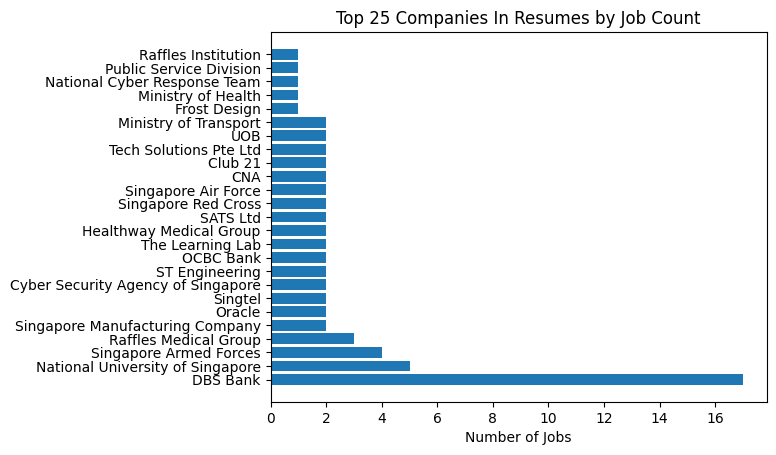

In [7]:
# plot the top 20 companies

top_companies = dict(sorted(aggregated_data.items(), key=lambda item: item[1], reverse=True)[:25])
plt.barh(list(top_companies.keys()), list(top_companies.values()))
plt.xlabel('Number of Jobs')
plt.title('Top 25 Companies In Resumes by Job Count')
plt.show()

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "meta-llama/Llama-3.1-8B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

res = []
for resume in df['resume']:
    prompt = f"""Your task is to generate a realistic name for the following anonymized resume from Singapore.
You will see a [Candidate Name] placeholder. Your job is to suggest a realistic name that fits the profile. Output the full name of the person only.
{resume}
Only generate the person's full name."""
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    generated_ids = model.generate(
        **inputs,
        max_new_tokens=32,
        do_sample=True,
        temperature=0.7
    )
    output = tokenizer.decode(generated_ids[0][inputs.input_ids.shape[1]:], skip_special_tokens=True)
    res.append(output.strip())
print("generate_text:", res)


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


KeyboardInterrupt: 

: 

In [ ]:
res

['**John Doe**',
 '**HR Assistant**',
 'CANDIDATE NAME: C.C.',
 'CANDIDATE NAME: C.J.',
 'Candidate Name: [Full Name]',
 'ST Engineering Singapore',
 'Dr. C. Ng',
 'The Learning Lab',
 '**Patient Health Advocate**',
 'Tan Tock Seng',
 '**SATS Ltd.**',
 'The full name of the person is [Candidate Name].',
 'Tan Tock Seng Hospital',
 '[Candidate Name]',
 '[Candidate Name]',
 'Candidate Name: Fitness First Team',
 'Lim Cheng',
 '[Candidate Name]',
 'SingTel Sales Supervisor',
 'SR. CAMPUS RECRUITER',
 'Chan Brother',
 '[Candidate Name]',
 'Consultant',
 '**SATS Ltd.**',
 '[Candidate Name]',
 'Candidate Name: Digit Media Operations Intern',
 'ComfortDelGro',
 '**CO-MANAGER**',
 '**The Fullerton Chef**',
 'KITCHEN UTILITY WORKER',
 'Candidate Name: FYI Finance Manager',
 'OCBC Bank',
 '[Candidate Name]',
 'CANDIDATE NAME',
 '**Craig Nguyen**',
 'The full name of the person is [Candidate Name].',
 'Candidate Name: Mr. John Doe',
 'Ernst & Young Singapore.',
 'Candidate Name: [Candidate Name]'

In [ ]:
from transformers import pipeline

# For prototyping, we can use a T5 model; in practice, you'd fine-tune it
name_predictor = pipeline(
    task="text2text-generation",
    model="t5-base",   # replace with your fine-tuned model
    tokenizer="t5-base"
)

resume_text = df['resume'][0]

# Prompt format – important for training consistency
prompt = f"Given the following anonymized resume from Singapore, generate an appropriate name of the person:\n{resume_text}\n\n Name - "

result = name_predictor(prompt)
# Only print the generated name
print(result[0]['generated_text'])

In [ ]:
print(result)